In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np# linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns
sns. set(color_codes= True)
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import recall_score
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Load the dataset
data = pd.read_csv('SBAcase.11.13.17.csv')

In [3]:
 # (1)Explore dataset structure and variables
data.info(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   float64
 1   LoanNr_ChkDgt      2102 non-null   float64
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   float64
 6   Bank               2102 non-null   object 
 7   BankState          2102 non-null   object 
 8   NAICS              2102 non-null   float64
 9   ApprovalDate       2102 non-null   float64
 10  ApprovalFY         2102 non-null   float64
 11  Term               2102 non-null   float64
 12  NoEmp              2102 non-null   float64
 13  NewExist           2102 non-null   float64
 14  CreateJob          2102 non-null   float64
 15  RetainedJob        2102 non-null   float64
 16  FranchiseCode      2102 

In [4]:
data.head(3)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,-0.5,-0.629401,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,0.088599,CALIFORNIA BANK & TRUST,CA,1.086275,-1.019257,...,0.0,-0.114815,-0.118706,0.0,0.0,0.0,0.0,-0.266667,-0.772495,0.0
1,0.5,-0.629341,DREAM HOME REALTY,TORRANCE,CA,-0.753738,CALIFORNIA BANK & TRUST,CA,-0.100000,-0.980743,...,0.0,-0.114815,-0.118706,0.0,0.0,0.0,1.0,-0.155556,-0.402346,0.0
2,-0.5,-0.629228,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,-0.167477,CALIFORNIA BANK & TRUST,CA,-0.100000,-0.940853,...,0.0,-0.114815,-0.118706,0.0,0.0,0.0,0.0,-0.266667,-0.741795,0.0


In [5]:
data.tail(3)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
2099,-0.5,1.510489,"A.J. STUDIO RENTALS, INC.",CAMARILLO,CA,0.166009,CITY NATIONAL BANK,CA,0.792157,-2.080468,...,0.0,-0.040741,-0.007475,0.0,0.0,0.857143,0.0,0.000000,-0.785224,0.0
2100,0.5,1.515863,TAHOE MOTION PICTURE RENTALS,SUN VALLEY,CA,-0.442997,CITY NATIONAL BANK,CA,0.792157,-2.072902,...,0.0,1.625926,1.483029,0.0,0.0,0.714286,0.0,0.200000,-0.500437,0.0
2101,-0.5,1.523854,EFM ASSOCIATES,LOS ANGELES,CA,-0.914060,WELLS FARGO BANK NATL ASSOC,SD,-0.198039,-2.062586,...,0.0,-0.096296,-0.107583,0.0,0.0,0.000000,0.0,-0.133333,0.000000,0.0


In [6]:

data. columns


Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [7]:
#(2)lean data for missing values and outliers
# Handling missing values
# Check for missing values

print("Missing Values:")
print(data.isnull().sum())

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

numeric_cols = data.select_dtypes(include=np.number).columns

# Impute missing values for numeric columns with median
imputer_numeric = SimpleImputer(strategy='median')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

categorical_cols = data.select_dtypes(include='object').columns

# Impute missing values for categorical columns with most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Dealing with outliers using RobustScaler
scaler = RobustScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Save cleaned data
data.to_csv("cleaned_SBAcase.11.13.17.csv", index=False)


Missing Values:
Selected             0
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
ChgOffDate           0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Recession            0
daysterm             0
xx                   0
Default              0
dtype: int64


In [8]:
#(3)Visualize patterns and relationsh


In [9]:
data = pd.read_csv("SBAcase.11.13.17.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   float64
 1   LoanNr_ChkDgt      2102 non-null   float64
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   float64
 6   Bank               2102 non-null   object 
 7   BankState          2102 non-null   object 
 8   NAICS              2102 non-null   float64
 9   ApprovalDate       2102 non-null   float64
 10  ApprovalFY         2102 non-null   float64
 11  Term               2102 non-null   float64
 12  NoEmp              2102 non-null   float64
 13  NewExist           2102 non-null   float64
 14  CreateJob          2102 non-null   float64
 15  RetainedJob        2102 non-null   float64
 16  FranchiseCode      2102 

In [11]:
nRow , nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2102 rows and 35 columns


In [12]:
data.head(5)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,-0.5,-0.629401,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,0.088599,CALIFORNIA BANK & TRUST,CA,1.086275,-1.019257,...,0.0,-0.114815,-0.118706,0.0,0.0,0.000000,0.0,-0.266667,-0.772495,0.0
1,0.5,-0.629341,DREAM HOME REALTY,TORRANCE,CA,-0.753738,CALIFORNIA BANK & TRUST,CA,-0.100000,-0.980743,...,0.0,-0.114815,-0.118706,0.0,0.0,0.000000,1.0,-0.155556,-0.402346,0.0
2,-0.5,-0.629228,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,-0.167477,CALIFORNIA BANK & TRUST,CA,-0.100000,-0.940853,...,0.0,-0.114815,-0.118706,0.0,0.0,0.000000,0.0,-0.266667,-0.741795,0.0
3,0.5,-0.629100,Shiva Management,SAN DIEGO,CA,-0.165642,CALIFORNIA BANK & TRUST,CA,0.000000,-0.575653,...,0.0,-0.040741,-0.074214,0.0,0.0,0.000000,0.0,-0.266667,-0.612505,0.0
4,0.5,-0.628989,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,-0.445565,SBA - EDF ENFORCEMENT ACTION,CO,0.076471,0.195323,...,0.0,1.044444,1.340652,0.0,1.0,1.428571,0.0,0.866667,1.206290,0.0


In [13]:
data.describe()

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.00000,2102.000000,2102.000000,2102.000000,2102.000000,...,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000
mean,0.000000,0.203779,0.051036,0.312650,-0.258881,-0.24108,0.238781,1.191801,0.153663,1.274976,...,1.328761,0.637274,0.656248,0.154139,0.274500,0.488728,0.068506,0.238781,0.201109,0.326356
std,0.500119,0.608390,0.689061,0.511605,1.000640,1.00158,0.521105,5.733737,0.362028,4.005087,...,5.004298,1.272707,1.330004,0.361168,0.446368,0.532912,0.252673,0.521105,0.712002,0.468991
min,-0.500000,-0.629401,-9.833073,-0.198039,-4.127923,-4.00000,-0.466667,-0.500000,-1.000000,0.000000,...,0.000000,-0.209259,-0.175434,0.000000,0.000000,-0.580657,0.000000,-0.466667,-1.933358,0.000000
25%,-0.500000,-0.295470,-0.424654,-0.100000,-0.591644,-0.50000,-0.133333,-0.166667,0.000000,0.000000,...,0.000000,-0.114815,-0.118706,0.000000,0.000000,0.000000,0.000000,-0.133333,-0.237239,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.704530,0.575346,0.900000,0.408356,0.50000,0.866667,0.833333,0.000000,1.000000,...,1.000000,0.885185,0.881294,0.000000,1.000000,1.000000,0.000000,0.866667,0.762761,1.000000
max,0.500000,1.523854,1.321288,1.762745,1.619670,1.75000,1.233333,107.833333,1.000000,65.000000,...,100.145952,8.477778,9.224749,1.000000,1.000000,1.428571,1.000000,1.233333,2.078622,1.000000


In [14]:
data.describe().columns

Index(['Selected', 'LoanNr_ChkDgt', 'Zip', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession', 'daysterm',
       'xx', 'Default'],
      dtype='object')

In [15]:
# look at numeric and categorial values separately
data_num = data[['Selected', 'LoanNr_ChkDgt', 'Zip', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession', 'daysterm',
       'xx', 'Default']]
data_cat = data[['Name', 'City', 'State', 'Bank', 'BankState']]

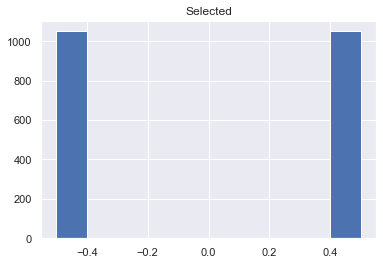

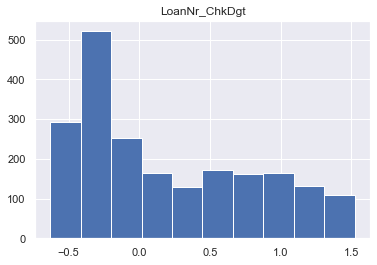

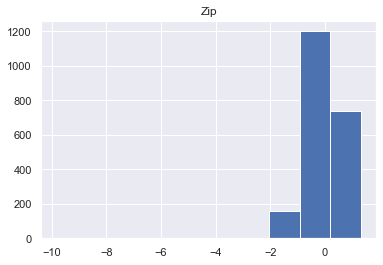

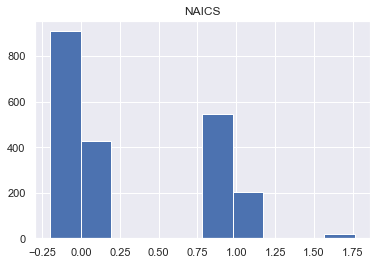

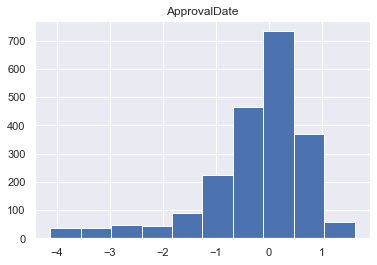

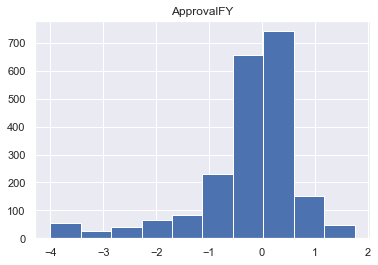

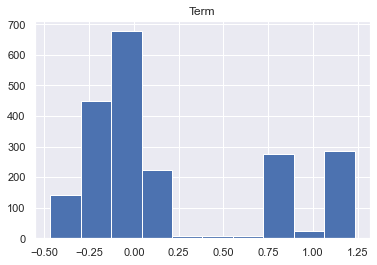

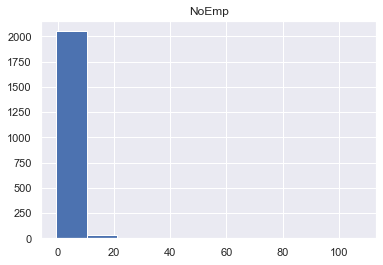

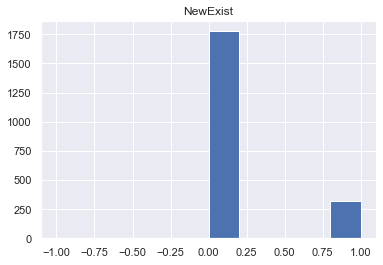

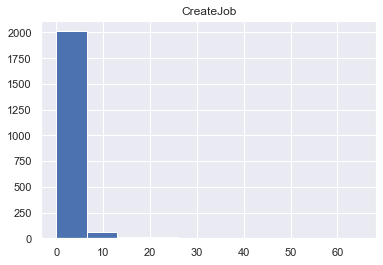

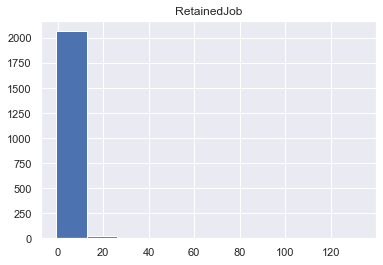

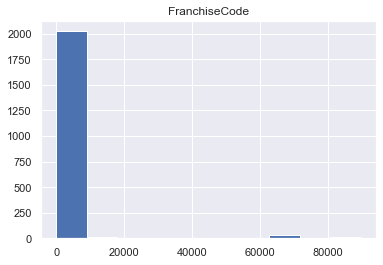

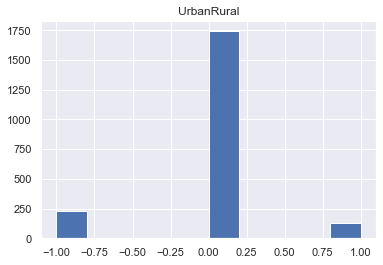

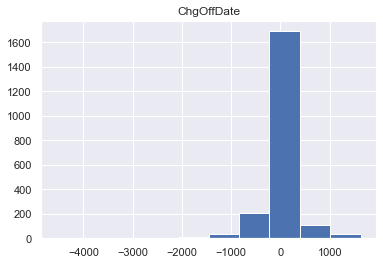

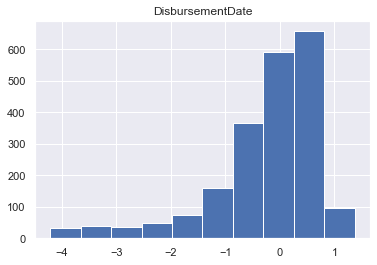

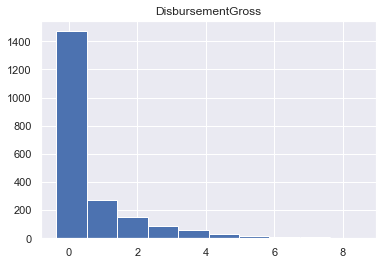

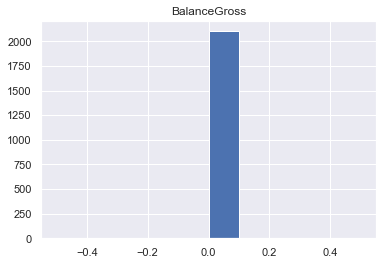

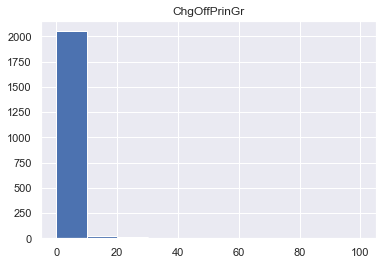

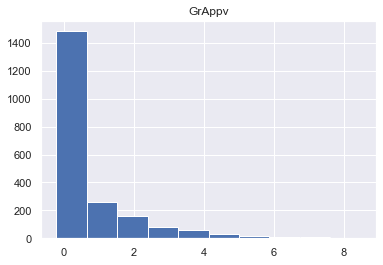

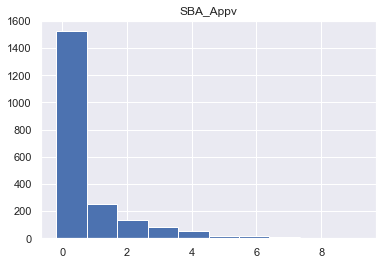

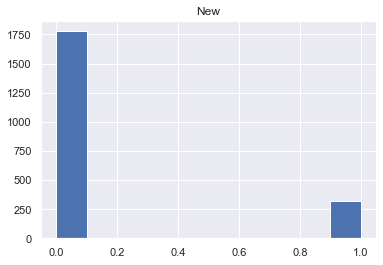

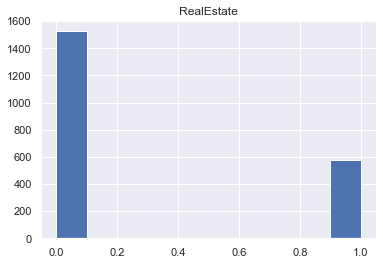

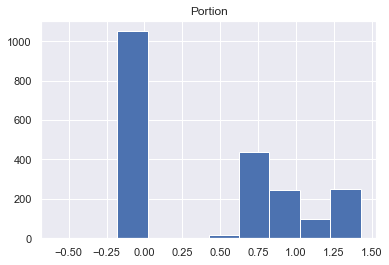

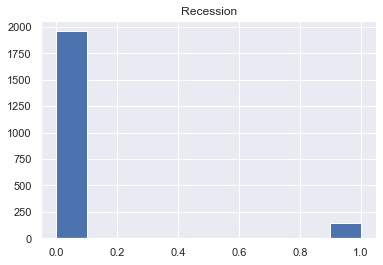

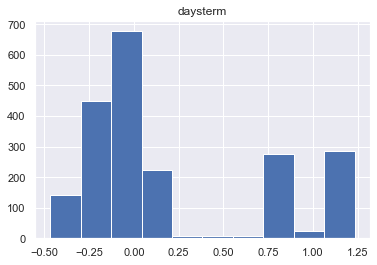

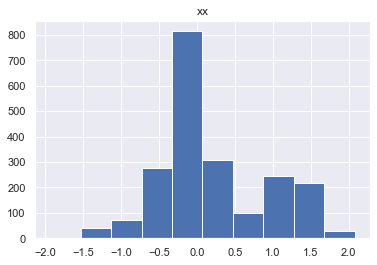

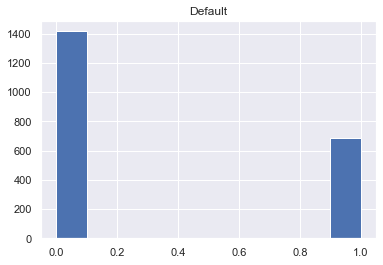

In [16]:
#distributions for all numeric values

for i in data_num.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [17]:
print(data_num.corr())

                   Selected  LoanNr_ChkDgt       Zip     NAICS  ApprovalDate  \
Selected           1.000000      -0.002071  0.031430 -0.009204      0.004578   
LoanNr_ChkDgt     -0.002071       1.000000 -0.020553  0.140983     -0.243970   
Zip                0.031430      -0.020553  1.000000 -0.075342     -0.023806   
NAICS             -0.009204       0.140983 -0.075342  1.000000     -0.398041   
ApprovalDate       0.004578      -0.243970 -0.023806 -0.398041      1.000000   
ApprovalFY         0.003682      -0.243239 -0.025069 -0.397177      0.997474   
Term               0.016391       0.230270  0.029317 -0.016858     -0.239511   
NoEmp              0.012490       0.091462 -0.005458 -0.045692     -0.028310   
NewExist          -0.051262      -0.076927  0.035820  0.033423     -0.047865   
CreateJob         -0.007723       0.083110 -0.005618 -0.082175      0.041259   
RetainedJob        0.014994       0.046504 -0.038190 -0.033438      0.040597   
FranchiseCode     -0.026212       0.0302

<AxesSubplot:>

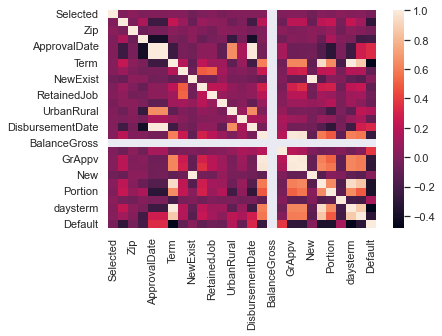

In [18]:

sns.heatmap(data_num.corr())

In [19]:
# compare Loan Status (Charged off or Paid in Full) across Zip Code, NewExist, Urban Rural, New 
pd.pivot_table(data, index = 'MIS_Status', values= ['Zip', 'NewExist', 'UrbanRural', 'New' ])

,New,NewExist,UrbanRural,Zip
MIS_Status,,,,
CHGOFF,0.163265,0.163265,0.049563,0.018686
P I F,0.149718,0.149011,-0.098870,0.066709


In [20]:
###for i in sba_cat.columns:
    ###sns.barplot(sba_cat[i].value_counts().index,sba_cat[i].value_counts()).set_title(i)
    ##plt.show()##

In [ ]:
#Utilize logistic regression for binary classification

In [ ]:
from sklearn.linear_model import LogisticRegression